In [3]:
from matplotlib import pyplot as plt 
import numpy as np  
%matplotlib inline

In [4]:
import sys
sys.path.append('../lib')
from simlib import *

In [5]:
def mean(t, x0=0, D=1, k=1, beta=1):
    return x0 * np.exp(-D*k*beta*t)

def var(t, D=1, k=1, beta=1):
    return 1/np.sqrt(k*beta) * (1-np.exp(-2*D*k*beta*t))

In [6]:
method = 'lang'
num_particles = 1000
max_t = 10
#dt = 0.001
x0 = 2
D = 1
beta = 1
k = 1
num_steps = int(max_t/dt)

In [7]:
Ns = [10, 100, 1000, 10000, 1000000]
N = 100000

In [8]:
RMSD = []
mean_sim = []
var_sim = []
times = []
dt = 0.01
for i, N in enumerate(Ns):
    ts, xs = simulate(harmonic_potential(k=k), method=method,
                      num_particles=N, dt=dt, max_t=max_t,
                      x0=x0, D=D, beta=beta)
    #times.append(ts)
    #mean_sim.append(np.mean(xs, axis=1))
    #var_sim.append(np.var(xs, axis=1))
    
    RMSD.append(np.sqrt(np.mean((mean_sim-mean_predict)**2)))

100%|██████████| 999/999 [00:00<00:00, 18436.54it/s]


NameError: name 'mean_predict' is not defined

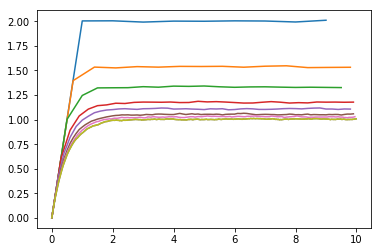

In [114]:
for t, v in zip(times, var_sim):
    plt.plot(t, v)
plt.plot(times[-1], var_sim[-1])

In [115]:
for m, s, dt, (i, ts) in zip(mean_sim, var_sim, DTs, enumerate(times)):
    with open('../data/harmonic_behavior_dt_{}.data'.format(dt), 'w') as f:
        for t, mi, si in zip(ts, m, s):
            f.write('{} {} {} {}\n'.format(t, mi, si, i))